# Import Required Libraries
Import the necessary libraries, including TensorFlow, NumPy, and scikit-learn.

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
import time

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model_download/final_model/alldir_mobilenetv2_fp16_planB_ariel2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

2024-12-12 22:10:37.764284: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 22:10:37.764345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 22:10:37.766241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 22:10:37.773214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-12 22:10:39.077831: W tensorflow/compiler/tf2

# Load TFLite Model
Load the quantized TFLite model using the TensorFlow Lite Interpreter.

In [15]:
# Load TFLite Model
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model_download/final_model/alldir_mobilenetv2_fp16_planB_ariel4.tflite")
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare Test Data
Load and preprocess the test dataset, including resizing images and creating batches.

In [4]:
# Prepare Test Data
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'datasets/datasets/test_all',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),  # Adjust based on your model's input size
    batch_size=32
)

# Initialize lists to hold test data and labels
X_test = []
y_test = []

# Iterate over the test dataset and collect images and labels
for images, labels in test_dataset:
    X_test.extend(images.numpy())
    y_test.extend(labels.numpy())

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

Found 8289 files belonging to 5 classes.
Using 1657 files for validation.


2024-12-12 22:10:55.398300: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-12 22:10:55.602162: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-12 22:10:55.602270: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-12 22:10:55.607284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-12 22:10:55.607348: I external/local_xla/xla/stream_executor

# Run Inference and Measure Latency
Run inference on the test data, measure the latency for each prediction, and store the results.

In [5]:
# Run Inference and Measure Latency

import time

# Initialize lists to hold predictions and latencies
y_pred = []
latencies = []

# Run inference on the test data and measure latency
for i in range(len(X_test)):
    input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    start_time = time.time()
    interpreter.invoke()
    end_time = time.time()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred.append(np.argmax(output_data))
    
    latency = end_time - start_time
    latencies.append(latency)

# Calculate evaluation metrics
average_latency = np.mean(latencies)

# Display the results
print(f"Average Latency: {average_latency} seconds")

Accuracy: 0.19070609535304767
Average Latency: 0.006708376365896443 seconds


# Calculate Evaluation Metrics
Calculate and display the accuracy and average latency of the model predictions.

In [6]:
# Calculate Evaluation Metrics

import time
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to hold predictions and latencies
y_pred = []
latencies = []

# Run inference on the test data and measure latency
for i in range(len(X_test)):
    input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    start_time = time.time()
    interpreter.invoke()
    end_time = time.time()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred.append(np.argmax(output_data))
    
    latency = end_time - start_time
    latencies.append(latency)

# Calculate evaluation metrics
average_latency = np.mean(latencies)

# Display the results
print(f"Average Latency: {average_latency} seconds")

Accuracy: 0.19070609535304767
Average Latency: 0.006628087866212779 seconds


Found 551 files belonging to 5 classes.
Average Latency: 0.006538214138328705 seconds


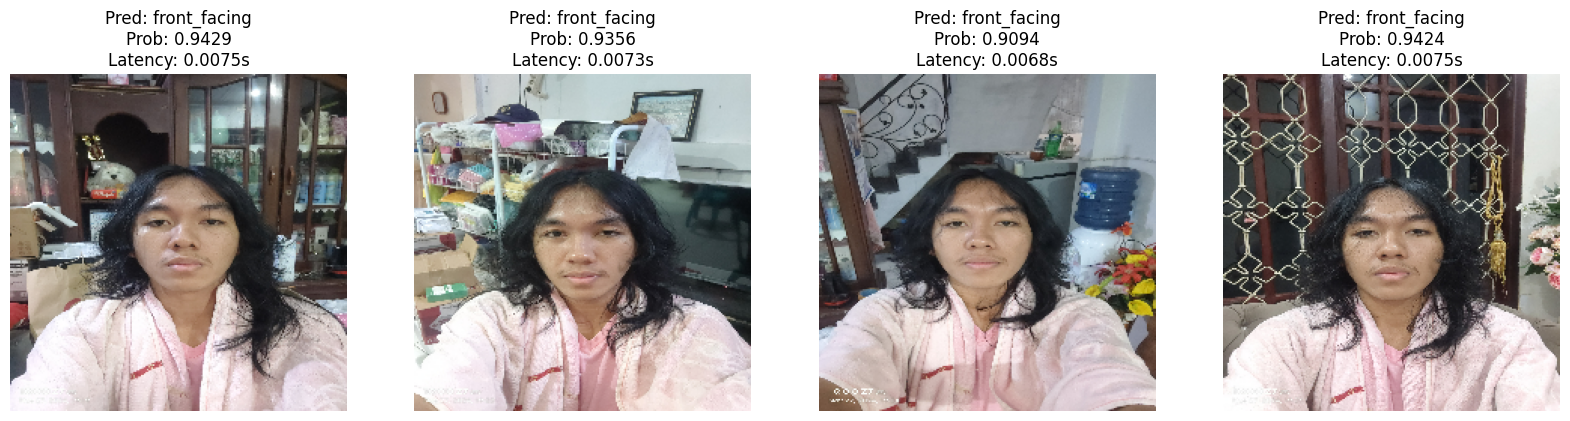

In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the labels
labels = ['front_facing', 'left', 'right', 'up']

# Prepare test data
X_test = []
y_test = []

for images, labels_batch in test_dataset:
    X_test.extend(images.numpy())
    y_test.extend(labels_batch.numpy())

X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize lists to hold predictions, latencies, and probabilities
y_pred = []
latencies = []
probabilities = []

# Run inference on the test data and measure latency
for i in range(len(X_test)):
    input_data = np.expand_dims(X_test[i], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    start_time = time.time()
    interpreter.invoke()
    end_time = time.time()
    
    output_data = interpreter.get_tensor(output_details[0]['index'])
    y_pred.append(np.argmax(output_data))
    probabilities.append(np.max(output_data))
    
    latency = end_time - start_time
    latencies.append(latency)

# Calculate evaluation metrics
average_latency = np.mean(latencies)

# Display the results
print(f"Average Latency: {average_latency} seconds")

# Display 4 sample images with their predictions, probabilities, and latencies
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].astype(np.uint8))
    ax.set_title(f"Pred: {labels[y_pred[i]]}\nProb: {probabilities[i]:.4f}\nLatency: {latencies[i]:.4f}s")
    ax.axis('off')

plt.show()